In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Exercício 1

dado os pontos $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$, para "fittá-los" em um modelo linear:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

- $\hat{y}$ é o valor previsto a partir da modelagem de: $y$, $\beta_0$, $\beta_1$.
- $\beta_0$ é a interceptação (intercept) da curva com o eixo y e $\beta_1$ é o coeficiente angular 

## Primeiro passo: definimos o resíduo da curva

para cada ponto $(x_i, y_i)$, o resíduo (ou erro) é a diferença observada entre $y_i$ e $\hat{y}_i$, onde "y chapéu" é $\hat{y}_i = \beta_0 + \beta_1 x_i$:

$$
\text{Erro ou Resíduo} = y_i - \hat{y}_i = y_i - (\beta_0 + \beta_1 x_i)
$$

Em uma regressão linear, temos como meta minimizar esses resíduos dado um valor para ($\beta_0$, $\beta_1$):

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2
$$

Para o caso que queremos de alguma maneira influenciar no cálculo do erro ($\beta_0$, $\beta_1$), esse é o momento de fazer modificações, já que essa é a equação que iremos derivar e isolar e encontrar $\beta_0$ e $\beta_1$.

Para adicionar os erros, vamos adicionar (somente na parte direita da equação) o valor $1/\sigma_i^2$, onde é algum erro externo que identificamos para cada valor de $y_i$:

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} \left(\frac{y_i - (\beta_0 + \beta_1 x_i)}{\sigma_i}\right)^2
$$

notando que, nesse step podemos fazer **qualquer** modificação para ter outros valores de $\beta_0$ e $\beta_1$, por exemplo:

A regressão de Lasso:

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 + \lambda \sum_{i=1}^{n} |\beta_i|
$$

dessa maneira, penalizamos caso o valor de $\beta_0$ e $\beta_1$ caso sejam muito grandes, entre outras diversas formas de fazer reg. lineares


## Step 2: Minimizando (derivando) S:

Para encontrar os valores que melhor se adequam aos nossos dados, fazemos as derivadas parciais de S por $\beta_0$ e $\beta_1$ e igualamos a zero

### Derivada parcial de $\beta_0$:

$$
\frac{\partial S}{\partial \beta_0} = -2 \sum_{i=1}^{n} \frac{1}{\sigma_i^2} (y_i - \beta_0 - \beta_1 x_i) = 0
$$

simplificando:

$$
\sum_{i=1}^{n} \frac{y_i}{\sigma_i^2} = \beta_0 \sum_{i=1}^{n} \frac{1}{\sigma_i^2} + \beta_1 \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} 
$$

### Derivada parcial de $\beta_1$:

$$
\frac{\partial S}{\partial \beta_1} = -2 \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} (y_i - \beta_0 - \beta_1 x_i) = 0
$$

simplificando:

$$
\sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2} = \beta_0 \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} + \beta_1 \sum_{i=1}^{n} \frac{x_i^2}{\sigma_i^2}
$$

## Resolvendo para $\beta_0$ e $\beta_1$

Definimos as seguintes variáveis para melhor visualizar as equações definidas acima:

$$
S = \sum_{i=1}^{n} \frac{1}{\sigma_i^2}, \quad
S_x = \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2}, \quad
S_y = \sum_{i=1}^{n} \frac{y_i}{\sigma_i^2}, \quad
S_{xx} = \sum_{i=1}^{n} \frac{x_i^2}{\sigma_i^2}, \quad
S_{xy} = \sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2}
$$

Assim temos:

$$
S_y = \beta_0 S + \beta_1 S_x
$$

$$
S_{xy} = \beta_0 S_x + \beta_1 S_{xx}
$$

Resolvendo esse sistema de equações, encontramos os betas:

$$
\beta_1 = \frac{S S_{xy} - S_x S_y}{S S_{xx} - S_x^2}
$$

$$
\beta_0 = \frac{S_{xx} S_y - S_x S_{xy}}{S S_{xx} - S_x^2}
$$

## Equação final

E a expressão final:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Onde $\beta_0$ e $\beta_1$ foram definidos acima. Caso o erro seja maior para um ponto específico, ele terá menos impacto no valor final dos nossos betas.

In [2]:
# mostrando resultado anterior
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([1.2, 2.1, 3.3, 3.8, 5.2])
y_err = np.array([0.2, 0.15, 0.3, 0.25, 0.1])  

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

weights = 1.0 / y_err**2  
w_slope, w_intercept = np.polyfit(x, y, 1, w=weights)


<Axes: >

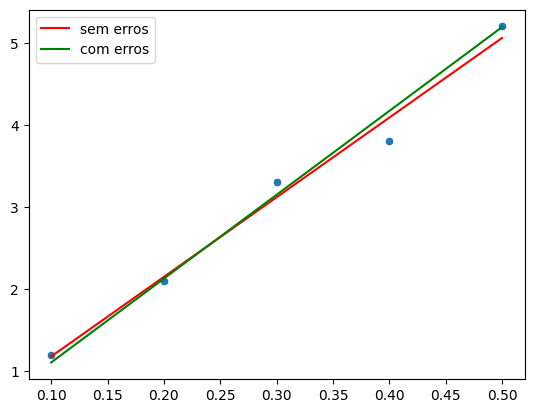

In [3]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=intercept + slope*x, color='red', label="sem erros")
sns.lineplot(x=x, y=w_intercept + w_slope*x, color='green', label="com erros")

# exercício 2

In [4]:
N_Total = 2567
N_background = 1223.5
L = 25  # fb^-1
syst_unc_L = 0.10  

## Erro propagado para a subtração:

Primeiro, o erro estatístico para ambas N_total e N_background é:

$\sigma_e = \sqrt{N}$

O erro propagado para a subtração é:

$\sigma_{prop} = \sqrt{sigma1^2 + sigma2^2}$

no nosso caso, como o sigma já é a raís quadrada:

$\sigma_{prop} = \sqrt{N_Total + N_background}$

e como na equação original onde propagamos o erro, como estamos divindo por L:

$\sigma_{prop} = \sqrt{N_Total + N_background} / L$ 

essa lógica toda está aplicada no código abaixo comentado.

In [5]:
sigma_superfície_de_contato = (N_Total - N_background) / L

# erro statistico propagado para a subtração (o que foi comentado acima):
stat_unc_sigma = round(np.sqrt(N_Total + N_background) / L, 2)

# error sistemático
syst_unc_sigma = round(sigma_superfície_de_contato * syst_unc_L, 2)

# Print results
print(" (σ):", sigma_superfície_de_contato, "fb")
print("erro estatistico:", stat_unc_sigma, "fb")
print("erro sistematico:", syst_unc_sigma, "fb")
print(f"valor: {sigma_superfície_de_contato} +- {stat_unc_sigma} +- {syst_unc_sigma} fb")

 (σ): 53.74 fb
erro estatistico: 2.46 fb
erro sistematico: 5.37 fb
valor: 53.74 +- 2.46 +- 5.37 fb


# Exercício 3:

Sabemos que a distribuição de Poisson (segundo as notas de aula):

$P(n, x) = \frac{e^{-x} x^ {n}}{n!}$

para 0 eventos encontrados com 95% de confiança:

$P(0, x) = \frac{e^{-x} 0^ {n}}{0!}$

$P(0, x) = e^{-x}$

e queremos que:

$P(0, x) > 0.05$

$e^{-x} > 0.05$

$ln(e^{-x}) > ln(0.05)$

$x < - ln(0.05)$

In [6]:
np.log(0.05**(-1))

np.float64(2.995732273553991)

que é aproximadamente 3.

# exercicio 4

## 1. Modelo linear

$y_i = a + b x_i + \epsilon_i$

onde:

* $a$ and $b$ são nossos parametros
* $\epsilon_i$ são os erros em $y_i$.

**Sabemos que**

* os erros são distribuídos em uma gaussiana/distribuição normal: $\epsilon_i \sim N(0, \sigma_i^2)$.

## 2. Resíduos

Os nossos resíduos são:

$r_i = y_i - (a + b x_i)$

fazendo:

$ S = \sum_{i=1}^{n} (r_i/\sigma_i)^2$

sabendo que

$ \sum_{i=1}^{n} ε_i/\sigma_i \approx \chi_n^2$

e que o valor esperado de Chi-squared:

$ E (\chi_n^2) = n $

significa que o valor esperado da distribuição é a quantidade de graus de liberdade que ela tem.

então:

$ E (\chi_{n - p}^2) = E(S) = n - p $

logo, no exercício temos:

$ \chi^2 / ndf = \chi^2/(n - p) => E(\chi^2) / ndf = E(\chi^2)/(n - p) = 1$

## 3. Interpretação

* Se $\chi^2 \approx 1$: O modelo fita bem dada o erro que informamos
* Se $\chi^2 \gg 1$: Os erros ($y_{real} - y_{previsto} $) são maiores que o esperado, sugerindo que o modelo não foi bem "fittado" ou que as nossas estimativas de erro estão subestimando o erro real.
* Se $\chi^2 \ll 1$: Os resíduos são menores que o esperado, indicando "overfitting" (quando o nosso modelo só irá atuar bem para o caso que "fittamos" e terá um atuação ruim para dados fora do nosso treino), ou que os nossos erros estão superestimados.

# Exemplos

1. fit praticamente perfeito

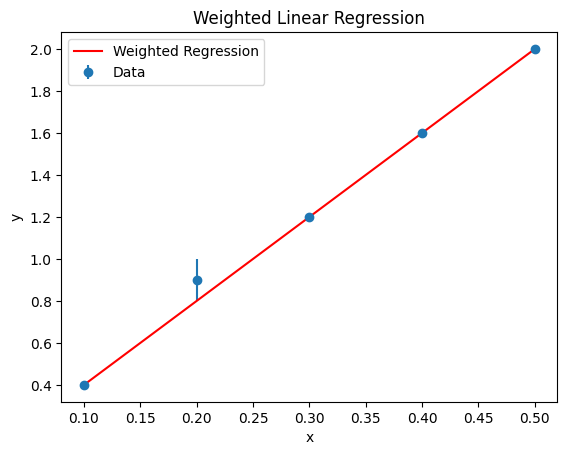

In [7]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([0.4, 0.9, 1.2, 1.6, 2.0])
y_err = np.array([1e-10, 0.1, 1e-10, 1e-10, 1e-10])  

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

weights = 1.0 / y_err**2  
w_slope, w_intercept = np.polyfit(x, y, 1, w=weights)


chi2 = np.sum(((y - (w_intercept + w_slope * x)) / y_err) ** 2)


nu = len(x) - 2  # n - p

# chi normalizado
chi2_nu = chi2 / nu

plt.errorbar(x, y, yerr=y_err, fmt="o", label="dado")
sns.lineplot(x=x, y=w_intercept + w_slope * x, color="red", label="Reg. linear")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Reg. Linear com pesos")
plt.show()

In [8]:
chi2

np.float64(1.00000000004931)

2. fit errondo

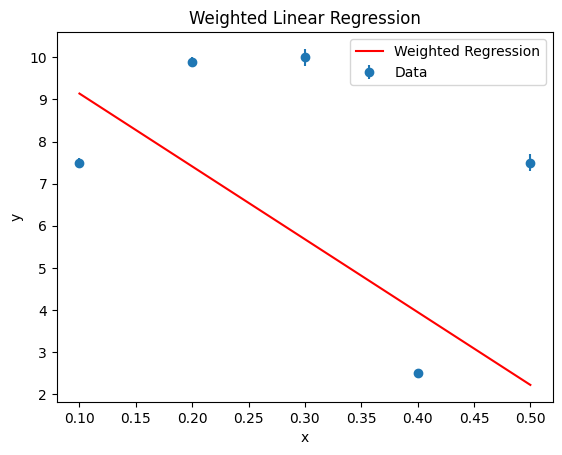

In [9]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([7.5, 9.9, 10, 2.5, 7.5])
y_err = np.array([0.1, 0.1, 0.2, 0.1, 0.2])  

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

weights = 1.0 / y_err**2  
w_slope, w_intercept = np.polyfit(x, y, 1, w=weights)


chi2 = np.sum(((y - (w_intercept + w_slope * x)) / y_err) ** 2)

nu = len(x) - 2  # n - p

chi2_nu = chi2 / nu

plt.errorbar(x, y, yerr=y_err, fmt="o", label="dado")
sns.lineplot(x=x, y=w_intercept + w_slope * x, color="red", label="Reg. linear")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Reg. Linear com pesos")
plt.show()

In [10]:
chi2

np.float64(2262.739999999998)

Se fizermos mudanças SOMENTE na variável do erro, como o chi² leva em conta o erro das variáveis (vamos fazer uma mudança bem absurda somente para ver a mudança no chi²)

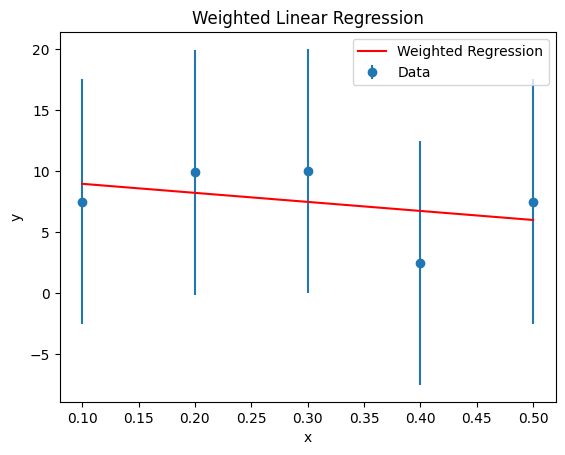

In [11]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([7.5, 9.9, 10, 2.5, 7.5])
y_err = np.array([10, 10, 10, 10, 10])  

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

weights = 1.0 / y_err**2  
w_slope, w_intercept = np.polyfit(x, y, 1, w=weights)


chi2 = np.sum(((y - (w_intercept + w_slope * x)) / y_err) ** 2)

nu = len(x) - 2  # n - p

chi2_nu = chi2 / nu

plt.errorbar(x, y, yerr=y_err, fmt="o", label="dado")
sns.lineplot(x=x, y=w_intercept + w_slope * x, color="red", label="Reg. linear")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Reg. Linear com pesos")
plt.show()

In [12]:
chi2

np.float64(0.31532000000000004)

agora ficou abaixo de 1, temos erros que estão sendo superestimados para a quantidade de dados que temos.